# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://github.com/Faiqa-Sajid/Pandas-Data-Science-Tasks/tree/master/SalesAnalysis/Output 

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

I am importing Pandas it is a library of python used for data manipulation and analysis. I am also importing matplotlib to help plot graphs and visualization for my Sales Analysis Dataset .

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

Below I am creating a dataframe of my 12 months of Sales files which is combined in a single dataframe :

In [2]:
all_data = pd.read_csv(r"C:\Anaconda\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data/all_data.csv")
all_data.head()                       

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


While performing EDA on my sales analysis dataset I am thinking from a sales manager perspective. To begin with I will like to have answers for a couple of questions in order to increase the profits for my company.But before that I would have to cleanup my data first in order to get the correct facts and figures.

Below I want to see all the NaN values of my dataset:

In [4]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


Now that I know exactly where my NaN values are ; I will drop all of those

In [5]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


While I was converting the months column format to strings I encountered this error: invalid literal for int() with base 10: 'Or' 
So now the task is to Find 'Or' and delete it :

In [6]:
temp_df =  all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
#deleting 'Or' values :
all_data =  all_data[all_data['Order Date'].str[0:2] != 'Or']

In [8]:
#Converting columns to the correct type :
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered']) #Make int
all_data['Price Each'] = pd.to_numeric(all_data['Price Each']) # Make float

Add month column: I added month columns and I was trying to change the format in strings to clearly compare  the different months for sale . While doing that it appeared that my data had some NaN values which a I got rid of in the in the above cells.

In [10]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


Adding a sales column: in order to answer my question regarding what month was the best in sales :

In [11]:
all_data['Sales'] = all_data["Quantity Ordered"] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Adding a city column : It will help me to easily browse through the cities which were the best in sales: 

In [12]:
#lets do this by .apply() mehtod : 
#reference for lambda function: 
#https://stackoverflow.com/questions/37428218/how-to-properly-apply-a-lambda-function-into-a-pandas-data-frame-column


def get_city(address):
    return address.split(',')[1]


def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data["City"] = all_data["Purchase Address"].apply(lambda x: f"{get_city(x)} ({get_state(x)}")
    
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA


Now that I have cleaned my data and added the required columns to help in my analysis and to better understand the Sales for my company , I can begin to search for some of the answers to my sales related questions :

# Question1 What was the best month for sales ? How much was earned that month ?

In [13]:
results = all_data.groupby('Month').sum()
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

Creating a bar chart to display the best month in sales :

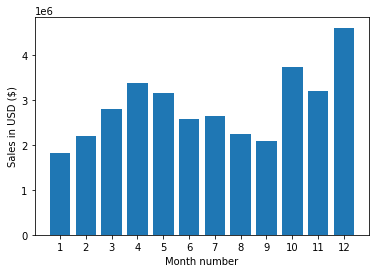

In [14]:
months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

As we can see above that December was the best month in sale with over 4 million in sales while January was the worst with 1.822 of sales. It makes sense to me as having more then 5 years of retail experience I have always witness a huge crowd during December which is mostly due to the holiday season in U.S. And then January is the lowest in sales beacause people mostly like to return stuff in this month rather then buying.

# Question 2: What city had the highest number of Sales ?

In [15]:
results = all_data.groupby('City').sum()
results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA,16602,2.779908e+06,104794,2.795499e+06
Austin (TX,11153,1.809874e+06,69829,1.819582e+06
Boston (MA,22528,3.637410e+06,141112,3.661642e+06
Dallas (TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA,33289,5.421435e+06,208325,5.452571e+06
New York City (NY,27932,4.635371e+06,175741,4.664317e+06
Portland (ME,2750,4.471893e+05,17144,4.497583e+05
Portland (OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA,50239,8.211462e+06,315520,8.262204e+06


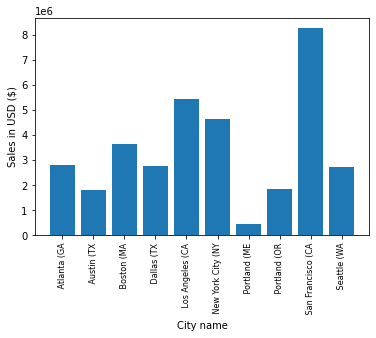

In [16]:
#Plotting the city with the most sales:

cities = [city for city, df in all_data.groupby('City')]



plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City name')
plt.show()

Looks like San Francisco was the highest in sales!

# Question :3 What time should we display advertisements to maximize likelihood of customer's buying product ?

#to answer this question we are going to dig in deeper in the Order Date column. Here I will be adding two columns of hour and minute to get an accurate idea of the most popular ordering times:

In [17]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [18]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA,9,27


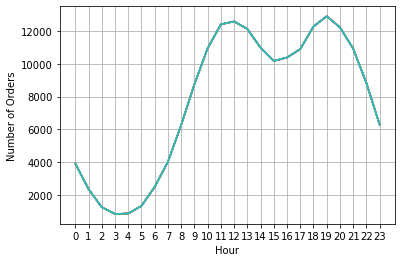

In [19]:
#plotting down the popular hours people make orders:
hours = [hour for hour,df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

By looking at this graph it looks like 11 am and 7 pm are the most famous hours for orders . I would guess 11 am is probably common for the people who are having there break time during work . Or it could  be the stay at home folks. 7pm makes more sense as people are mostly done with there jobs by then and done with there day to day tasks .

My approach to this question would be that it will be best to display advertisements around 11 am or 6pm as those timings show the peaks for orders. 

# Question 4: What products are most often sold together ?
To answer this question one thing to notice would be the Order ID column . If the order id's are same it means that those products are sold together . By counting all the duplicated order i.d's we can figure out which products were sold together the most.

In [20]:
#Creating a dataframe for duplicated Order Id rows:
df = all_data[all_data["Order ID"].duplicated(keep=False)]

#Creating a 'Grouped' column for the duplicated pairs of items that are brought together and also arranging it in a more readable format:
df['Grouped'] = df.groupby('Order ID') ['Product'].transform(lambda x: ','.join(x))

#dropping the repeated pair of duplicates here:
df = df[['Order ID','Grouped']].drop_duplicates()

df.head()

C:\Users\FAIQAS~1\AppData\Local\Temp/ipykernel_3480/3926440882.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID') ['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [21]:
#to count the pairs of what occurs together most frequently;for that we need to import few other libraries:
#itertools reference: https://stackoverflow.com/questions/51615325/python-itertools-combinations-on-objects
from itertools import combinations 
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


From this I come to the conclusion that the most common items that are sold together are iPhone and a lightning Charging Cable. If I am working as a sales manager I will use this information to get innovative with the promotions that we are offering to customers; for instance if my company is selling iphone we can try to offer a smart deal to attract a bigger audience to purchase iphone with a extra lightning Charging cable . I can also use this approach for my other common pairs to use that as my advantage to increase sales for my company.

# Question 5: What products are sold the most ? Why do we think it sold the most ?

In [22]:
#to answer that lets group by products:
product_group = all_data.groupby('Product')

product_group.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


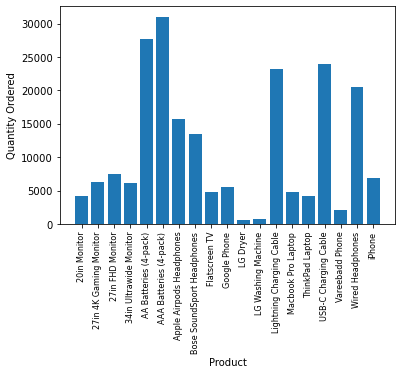

In [23]:
#Creating a graph to display the most sold item :

product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products= [product for product,df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products,rotation='vertical',size=8)

plt.show()

I come to the conclusion that the most common items that are sold together are iPhone and a lightning Charging Cable. If I am working as a sales manager I will use this information to get innovative with the promotions that we are offering to customers; for instance if my company is selling iphone we can try to offer a smart deal to attract a bigger audience to purchase iphone with a extra lightning Charging cable . I can also use this approach for my other common pairs to use that as my advantage to increase sales for my company.

Below I am comparing prices of the products in comparison to there sales :

In [25]:
prices = all_data.groupby('Product').mean()["Price Each"]

print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\FAIQAS~1\AppData\Local\Temp/ipykernel_3480/2382636010.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


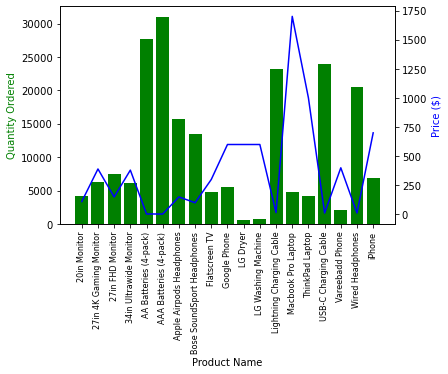

In [26]:
prices = all_data.groupby('Product').mean()["Price Each"]

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')



ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)



plt.show()

From this visualization I can see that with most of the products the cheaper the items were and the most sale we had from them.

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
I need to research more on why San francissco was the highest city in sale. To me that was surprising.
2. Do you have any concerns about your dataset? 
I did not come acrross to any concerns yet with my dataset.
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 
I had to clean my data here in this notebook before I could perform any further analysis , I guess my next notebook would have to be a repetition of the part Clean data.